# Proyecto de Grado

Presentado por Sofía Gutiérrez

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Proyecto-de-Grado" data-toc-modified-id="Proyecto-de-Grado-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Proyecto de Grado</a></span><ul class="toc-item"><li><span><a href="#Preprocesamiento-de-los-Datos" data-toc-modified-id="Preprocesamiento-de-los-Datos-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Preprocesamiento de los Datos</a></span></li><li><span><a href="#Cargar-Datos" data-toc-modified-id="Cargar-Datos-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Cargar Datos</a></span></li><li><span><a href="#Añadir-fechas-faltantes" data-toc-modified-id="Añadir-fechas-faltantes-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Añadir fechas faltantes</a></span></li><li><span><a href="#Llenar-temperaturas-faltantes" data-toc-modified-id="Llenar-temperaturas-faltantes-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Llenar temperaturas faltantes</a></span></li><li><span><a href="#Llenar-velocidad-del-viento-faltante" data-toc-modified-id="Llenar-velocidad-del-viento-faltante-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Llenar velocidad del viento faltante</a></span></li><li><span><a href="#Pruebas-de-Calidad" data-toc-modified-id="Pruebas-de-Calidad-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Pruebas de Calidad</a></span></li><li><span><a href="#Guardar-Datos" data-toc-modified-id="Guardar-Datos-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Guardar Datos</a></span></li></ul></li></ul></div>

## Preprocesamiento de los Datos

In [4]:
# Librerías
import pandas as pd
import numpy as np
import os

# COnfiguración
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Cargar Datos

In [5]:
ruta = os.getcwd()+"\\data\\"
# Cargar datos desde Excel
data = pd.read_excel(ruta+'UNIANDES_SD_2021-02-01.xlsx')

# Marcar Vacíos
data = data.replace("--", np.nan)

# Ejemplo datos
print("Tamaño: {}".format(data.shape))
data.head(3)

Tamaño: (15253, 30)


,Date & Time,Date,Time,Temp - °C,Temp. Alta - °C,Temp. Baja - °C,Hum - %,Punto de rocío - °C,Wet Bulb - °C,Velocidad del viento - m/s,Dirección del viento,Viento Corriente - m,Alta velocidad del viento - m/s,Alta Dirección del viento,Viento Frío - °C,Índice de calor - °C,THW Index - °C,THSW índice - °C,Barómetro - mm Hg,Lluvia - mm,Tasa de lluvia - mm/h,Rad Solar - W/m^2,Energía solar,Rad Solar Alta - W/m^2,ET - mm,El índice UV - Index,Dosis de UV,Alto índice UV - Index,Días-grado de calentamiento,Días-grado de enfriamiento
0,2019-05-07 16:00:00,2019-05-07,16:00:00,21.2,21.3,21.2,47.0,9.5,12.2,0.9,ENE,0.89,1.8,ESE,21.2,20.2,20.2,NaN,556.2,0.0,0.0,NaN,NaN,NaN,0.00,1.6,0.69,1.6,0.000,0.217
1,2019-05-07 17:00:00,2019-05-07,17:00:00,19.4,23.0,19.4,52.0,9.3,11.8,0.4,E,0.45,4.5,SE,19.4,18.7,18.7,19.4,556.3,0.0,0.0,59.0,5.08,162.0,0.05,0.4,0.17,1.6,0.000,0.083
2,2019-05-07 18:00:00,2019-05-07,18:00:00,17.4,19.5,17.4,60.0,9.6,11.7,1.3,ESE,1.34,4.9,ESE,17.4,16.8,16.8,16.1,555.9,0.0,0.0,47.0,4.04,97.0,0.05,0.0,0.00,0.5,0.067,0.000


## Añadir fechas faltantes

In [6]:
# Fecha mínima y máxima
min_date = data["Date & Time"].min()
max_date = data["Date & Time"].max()

# Todas las fechas entre 'min_darte' y 'max_date'
all_dates = pd.date_range(start = min_date, end = max_date, freq="H")

# Fijar la fecha como el índice
data = data.set_index("Date & Time")

# Rellenar fechas faltantes
data = data.reindex(all_dates, fill_value=np.nan)

# Regresar fecha como columna
data = data.reset_index().rename(columns={"index":"Date & Time"})

# Nueva tabla
print("Nuevo tamaño {}".format(data.shape))
data.head(3)

Nuevo tamaño (15258, 30)


,Date & Time,Date,Time,Temp - °C,Temp. Alta - °C,Temp. Baja - °C,Hum - %,Punto de rocío - °C,Wet Bulb - °C,Velocidad del viento - m/s,Dirección del viento,Viento Corriente - m,Alta velocidad del viento - m/s,Alta Dirección del viento,Viento Frío - °C,Índice de calor - °C,THW Index - °C,THSW índice - °C,Barómetro - mm Hg,Lluvia - mm,Tasa de lluvia - mm/h,Rad Solar - W/m^2,Energía solar,Rad Solar Alta - W/m^2,ET - mm,El índice UV - Index,Dosis de UV,Alto índice UV - Index,Días-grado de calentamiento,Días-grado de enfriamiento
0,2019-05-07 16:00:00,2019-05-07,16:00:00,21.2,21.3,21.2,47.0,9.5,12.2,0.9,ENE,0.89,1.8,ESE,21.2,20.2,20.2,NaN,556.2,0.0,0.0,NaN,NaN,NaN,0.00,1.6,0.69,1.6,0.000,0.217
1,2019-05-07 17:00:00,2019-05-07,17:00:00,19.4,23.0,19.4,52.0,9.3,11.8,0.4,E,0.45,4.5,SE,19.4,18.7,18.7,19.4,556.3,0.0,0.0,59.0,5.08,162.0,0.05,0.4,0.17,1.6,0.000,0.083
2,2019-05-07 18:00:00,2019-05-07,18:00:00,17.4,19.5,17.4,60.0,9.6,11.7,1.3,ESE,1.34,4.9,ESE,17.4,16.8,16.8,16.1,555.9,0.0,0.0,47.0,4.04,97.0,0.05,0.0,0.00,0.5,0.067,0.000


## Llenar temperaturas faltantes

In [7]:
# Llenar con datos cercanos
num_periods = 9 # 4 antes + 4 después + Periodo actual (no cuentan los nan)
average_temps = data["Temp - °C"].rolling(num_periods, center=True, min_periods=1).mean()
data["Temp - °C"] = data["Temp - °C"].fillna(average_temps)

# Llenar faltantes con promedios de hora
average_temps_hour = data.groupby("Time")["Temp - °C"].mean().to_dict()
data["Temp - °C"] = data.apply(
    lambda row: average_temps_hour[row["Time"]] if np.isnan(row["Temp - °C"]) else row["Temp - °C"], 
    axis=1)

# Primeras columnas
data.head(3)

,Date & Time,Date,Time,Temp - °C,Temp. Alta - °C,Temp. Baja - °C,Hum - %,Punto de rocío - °C,Wet Bulb - °C,Velocidad del viento - m/s,Dirección del viento,Viento Corriente - m,Alta velocidad del viento - m/s,Alta Dirección del viento,Viento Frío - °C,Índice de calor - °C,THW Index - °C,THSW índice - °C,Barómetro - mm Hg,Lluvia - mm,Tasa de lluvia - mm/h,Rad Solar - W/m^2,Energía solar,Rad Solar Alta - W/m^2,ET - mm,El índice UV - Index,Dosis de UV,Alto índice UV - Index,Días-grado de calentamiento,Días-grado de enfriamiento
0,2019-05-07 16:00:00,2019-05-07,16:00:00,21.2,21.3,21.2,47.0,9.5,12.2,0.9,ENE,0.89,1.8,ESE,21.2,20.2,20.2,NaN,556.2,0.0,0.0,NaN,NaN,NaN,0.00,1.6,0.69,1.6,0.000,0.217
1,2019-05-07 17:00:00,2019-05-07,17:00:00,19.4,23.0,19.4,52.0,9.3,11.8,0.4,E,0.45,4.5,SE,19.4,18.7,18.7,19.4,556.3,0.0,0.0,59.0,5.08,162.0,0.05,0.4,0.17,1.6,0.000,0.083
2,2019-05-07 18:00:00,2019-05-07,18:00:00,17.4,19.5,17.4,60.0,9.6,11.7,1.3,ESE,1.34,4.9,ESE,17.4,16.8,16.8,16.1,555.9,0.0,0.0,47.0,4.04,97.0,0.05,0.0,0.00,0.5,0.067,0.000


## Llenar velocidad del viento faltante

In [8]:
# Llenar con datos cercanos
num_periods = 9 # 4 antes + 4 después + Periodo actual (no cuentan los nan)
average_speeds = data["Velocidad del viento - m/s"].rolling(num_periods, center=True, min_periods=1).mean()
data["Velocidad del viento - m/s"] = data["Velocidad del viento - m/s"].fillna(average_speeds)

# Llenar faltantes con promedios de hora
average_speeds_hour = data.groupby("Time")["Velocidad del viento - m/s"].mean().to_dict()
data["Velocidad del viento - m/s"] = data.apply(
    lambda row: average_speeds_hour[row["Time"]] if np.isnan(row["Velocidad del viento - m/s"]) else row["Velocidad del viento - m/s"], 
    axis=1)

# Primeras columnas
data.head(3)

,Date & Time,Date,Time,Temp - °C,Temp. Alta - °C,Temp. Baja - °C,Hum - %,Punto de rocío - °C,Wet Bulb - °C,Velocidad del viento - m/s,Dirección del viento,Viento Corriente - m,Alta velocidad del viento - m/s,Alta Dirección del viento,Viento Frío - °C,Índice de calor - °C,THW Index - °C,THSW índice - °C,Barómetro - mm Hg,Lluvia - mm,Tasa de lluvia - mm/h,Rad Solar - W/m^2,Energía solar,Rad Solar Alta - W/m^2,ET - mm,El índice UV - Index,Dosis de UV,Alto índice UV - Index,Días-grado de calentamiento,Días-grado de enfriamiento
0,2019-05-07 16:00:00,2019-05-07,16:00:00,21.2,21.3,21.2,47.0,9.5,12.2,0.9,ENE,0.89,1.8,ESE,21.2,20.2,20.2,NaN,556.2,0.0,0.0,NaN,NaN,NaN,0.00,1.6,0.69,1.6,0.000,0.217
1,2019-05-07 17:00:00,2019-05-07,17:00:00,19.4,23.0,19.4,52.0,9.3,11.8,0.4,E,0.45,4.5,SE,19.4,18.7,18.7,19.4,556.3,0.0,0.0,59.0,5.08,162.0,0.05,0.4,0.17,1.6,0.000,0.083
2,2019-05-07 18:00:00,2019-05-07,18:00:00,17.4,19.5,17.4,60.0,9.6,11.7,1.3,ESE,1.34,4.9,ESE,17.4,16.8,16.8,16.1,555.9,0.0,0.0,47.0,4.04,97.0,0.05,0.0,0.00,0.5,0.067,0.000


## Pruebas de Calidad

In [9]:
# Check de vacíos
assert data["Temp - °C"].isna().sum() == 0, "La tabla contiene vacíos en Temperatura."
assert data["Velocidad del viento - m/s"].isna().sum() == 0, "La tabla contiene vacíos en Velocidad del Viento."
print("La tabla no tiene vacíos.")

La tabla no tiene vacíos.


In [10]:
import matplotlib.pyplot as plt
plt.plot(data["Date & Time"], data["Temp - °C"])

C:\Users\Sony\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


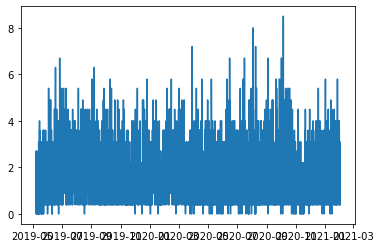

In [8]:
import matplotlib.pyplot as plt
plt.plot(data["Date & Time"], data["Velocidad del viento - m/s"])

## Guardar Datos

In [11]:
# Se guardan los datos
data.to_csv("datos_procesados.csv", index=False, encoding="latin-1")